In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
games = pd.read_csv("games.csv")
teams = pd.read_csv("teams.csv")
players = pd.read_csv("players.csv")

In [3]:
players

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [4]:
#Picked five years data to explore the relationship between points and assists, points and rebound
years = [2015,2016,2017,2018,2019]
games1 = games[games["SEASON"].isin(years)]
games1["PTS_home"] = (games1["PTS_home"]).astype(int)
games1["PTS_away"] = (games1["PTS_away"]).astype(int)
games1["AST_home"] = (games1["AST_home"]).astype(int)
games1["AST_away"] = (games1["AST_away"]).astype(int)
games1["REB_home"] = (games1["REB_home"]).astype(int)
games1["REB_away"] = (games1["REB_away"]).astype(int)

//anaconda3/envs/Pandas/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
//anaconda3/envs/Pandas/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/envs/Pandas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [5]:
games1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6546 entries, 0 to 21776
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     6546 non-null   object 
 1   GAME_ID           6546 non-null   int64  
 2   GAME_STATUS_TEXT  6546 non-null   object 
 3   HOME_TEAM_ID      6546 non-null   int64  
 4   VISITOR_TEAM_ID   6546 non-null   int64  
 5   SEASON            6546 non-null   int64  
 6   TEAM_ID_home      6546 non-null   int64  
 7   PTS_home          6546 non-null   int64  
 8   FG_PCT_home       6546 non-null   float64
 9   FT_PCT_home       6546 non-null   float64
 10  FG3_PCT_home      6546 non-null   float64
 11  AST_home          6546 non-null   int64  
 12  REB_home          6546 non-null   int64  
 13  TEAM_ID_away      6546 non-null   int64  
 14  PTS_away          6546 non-null   int64  
 15  FG_PCT_away       6546 non-null   float64
 16  FT_PCT_away       6546 non-null   float64

In [6]:
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

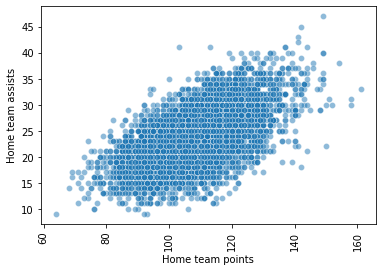

Correlation coefficient: 0.5948711805949385


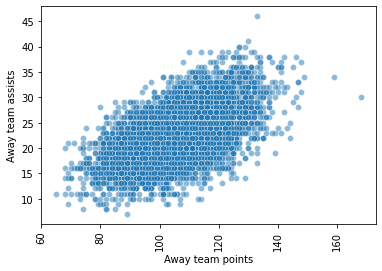

Correlation coefficient: 0.5751138228823566


In [7]:
sns.scatterplot(x="PTS_home",y="AST_home",data=games1,alpha=0.5)
plt.xlabel("Home team points")
plt.xticks(rotation = 90)
plt.ylabel("Home team assists")
plt.show()
print("Correlation coefficient:",pearson_r(games1["PTS_home"],games1["AST_home"]))

sns.scatterplot(x="PTS_away",y="AST_away",data=games1,alpha=0.5)
plt.xlabel("Away team points")
plt.xticks(rotation = 90)
plt.ylabel("Away team assists")
plt.show()
print("Correlation coefficient:",pearson_r(games1["PTS_away"],games1["AST_away"]))

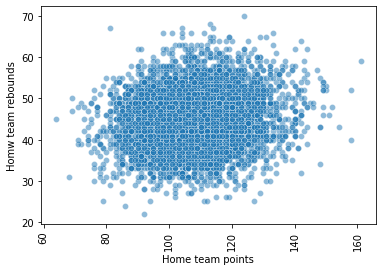

Correlation coefficient: 0.12865219664754846


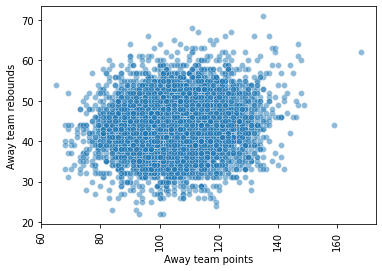

Correlation coefficient: 0.12490751487333311


In [8]:
sns.scatterplot(x="PTS_home",y="REB_home",data=games1,alpha=0.5)
plt.xlabel("Home team points")
plt.xticks(rotation = 90)
plt.ylabel("Homw team rebounds")
plt.show()
print("Correlation coefficient:",pearson_r(games1["PTS_home"],games1["REB_home"]))

sns.scatterplot(x="PTS_away",y="REB_away",data=games1,alpha=0.5)
plt.xlabel("Away team points")
plt.xticks(rotation = 90)
plt.ylabel("Away team rebounds")
plt.show()
print("Correlation coefficient:",pearson_r(games1["PTS_away"],games1["REB_away"]))

In [9]:
#Therefore, we can see that points and assists have a relatively great correlation, and points and rebounds
#have a relatively small but still positive relationship between each other no matter the home teams or guest teams.

In [10]:
#Trying to find how 2k define a player ratings 
stat = pd.read_csv("nba_2020_per_game.csv")
rate = pd.read_csv("nba2k20-full.csv")
rate = rate.rename(columns={"full_name": "Player"})
rate = rate.iloc[:,:2]
df = pd.merge(rate, stat, on = 'Player', how = 'left')

In [11]:
df = df[['Player', 'rating','Pos','Age','FG', 'FGA','FG%', '3P', '3PA', '3P%', '2P', '2PA', 
         '2P%', 'eFG%', 'FT', 'FTA','FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

In [12]:
df = pd.get_dummies(df, columns=['Pos'])
df = df.dropna()
df = df.reset_index().iloc[:,1:]
x = df.iloc[:,2:]

In [13]:
x

,Age,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,PTS,Pos_C,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG
0,35.0,9.6,19.4,0.493,2.2,6.3,0.348,7.4,13.1,0.564,...,25.3,0,0,0,0,1,0,0,0,0
1,28.0,9.3,19.9,0.470,2.2,5.7,0.378,7.2,14.2,0.506,...,27.1,0,0,0,0,0,1,0,0,0
2,25.0,10.9,19.7,0.553,1.4,4.7,0.304,9.5,15.0,0.631,...,29.5,0,0,1,0,0,0,0,0,0
3,30.0,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,...,34.3,0,0,0,0,0,0,0,0,1
4,31.0,6.6,16.4,0.402,2.4,9.8,0.245,4.2,6.6,0.636,...,20.8,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,28.0,3.5,10.8,0.326,0.8,4.0,0.188,2.8,6.8,0.407,...,11.8,0,0,0,0,0,0,0,0,1
426,24.0,2.2,5.6,0.400,0.8,2.6,0.299,1.5,3.0,0.485,...,6.1,0,0,0,0,1,0,0,0,0
427,25.0,0.5,2.2,0.241,0.3,1.8,0.174,0.2,0.5,0.500,...,2.1,0,0,0,0,0,0,0,0,1
428,19.0,0.8,2.0,0.400,0.0,0.8,0.000,0.8,1.2,0.667,...,2.0,0,0,0,0,1,0,0,0,0


In [14]:
y = df['rating']

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rfxtr,rfxts,rfytr,rfyts = train_test_split(x, y, test_size = 0.2, random_state = 10)
rf = RandomForestRegressor()
rf.fit(rfxtr,rfytr)

RandomForestRegressor()

In [16]:
importance = rf.feature_importances_

In [17]:
col = list(x.columns)
d = {'Attributes': col, 'Importance': importance}
imp = pd.DataFrame(data = d)
imp = imp.sort_values(by = ['Importance'], ascending=False)
imp = imp.reset_index().iloc[:, 1:]

In [18]:
thre = 0.01
imp_select = imp[imp['Importance'] >= thre]

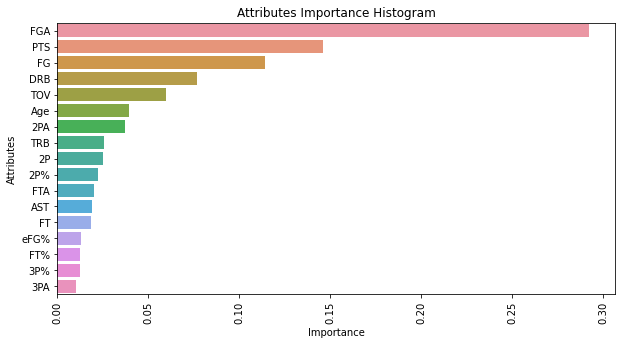

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x= imp_select['Importance'], y=imp_select['Attributes'])
plt.xticks(rotation=90)
plt.title('Attributes Importance Histogram')
plt.show()

In [20]:
rf.score(rfxts, rfyts)

0.7152847712320574

In [21]:
from sklearn import metrics
rfypred = rf.predict(rfxts)
print('Mean Absolute Error:', metrics.mean_absolute_error(rfyts, rfypred))
print('Mean Squared Error:', metrics.mean_squared_error(rfyts, rfypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(rfyts, rfypred)))

Mean Absolute Error: 2.1544186046511626
Mean Squared Error: 8.23872558139535
Root Mean Squared Error: 2.8703180279187444


In [22]:
#From our model result, we can see that FG Attempts, Points, Field goals, Defense Rebounds, and Turnovers are the 
#most important features of deciding a player's 2k rating.